In [1]:
from __future__ import print_function
%matplotlib notebook

# FluidImage, a libre Python framework for scientific processing of large series of images

### Preprocessing of images

### PIV

## FluidImage keywords

- Libre, open-source, Python scientific environment,
- Tested and documented,
- Efficient computation,
- Asynchrone, "big data", parallel, topology
- CPU, GPU, clusters

At LEGI: UVmat and FluidImage are complementary tools.

## How to use fluidimage

- Python library and development framework
- Launch computations with Python scripts (very expressive and powerful)
- Graphical launcher for "simple computations"

## Minimal script for PIV with a "topology"

In [2]:
from fluidimage.topologies.piv import TopologyPIV

params = TopologyPIV.create_default_params()

params.series.path = '../../image_samples/Karman/Images'
params.series.ind_start = 1
params.series.ind_step = 2

params.piv0.shape_crop_im0 = 32
params.multipass.number = 2
params.multipass.use_tps = True

params.saving.how = 'recompute'
params.saving.postfix = 'piv_pres'

topology = TopologyPIV(params, logging_level='info')

topology.compute()

nb_cpus_allowed = 4
nb_max_workers =  6
nb_max_workers_io =  4
Add 2 PIV fields to compute.
Files of serie 0: (u'Karman_01.bmp', u'Karman_02.bmp')
Files of serie 1: (u'Karman_03.bmp', u'Karman_04.bmp')
INFO: path results:
../../image_samples/Karman/Images.piv_pres
INFO: 2017-04-04_13-24-31.83: start compute. mem usage: 113.668 Mb
INFO: 0.02 s. Launch work fluidimage.topologies.waiting_queues.base.load_image (Karman_02.bmp). mem usage: 113.691 Mb
INFO: 0.02 s. Launch work fluidimage.topologies.waiting_queues.base.load_image (Karman_03.bmp). mem usage: 114.469 Mb
INFO: 0.03 s. Launch work fluidimage.topologies.waiting_queues.base.load_image (Karman_04.bmp). mem usage: 115.449 Mb
INFO: work fluidimage.topologies.waiting_queues.base.load_image (Karman_02.bmp) done in 0.08 s
INFO: work fluidimage.topologies.waiting_queues.base.load_image (Karman_04.bmp) done in 0.07 s
INFO: 0.12 s. Launch work fluidimage.works.piv.multipass.WorkPIV.calcul (Karman_01.bmp-Karman_02.bmp). mem usage: 117.051 Mb

## Parameters

In [3]:
params


<params>
  {"program": "fluidimage", "class": "TopologyPIV", "module":
  "fluidimage.topologies.piv"}
  <series ind_start="1" ind_step="2" ind_stop="None"
          path="../../image_samples/Karman/Images" strcouple="i:i+2"/>  

  <saving how="recompute" path="None" postfix="piv_pres"/>  

  <piv0 coef_correl_no_displ="None" delta_max="None" delta_mean="None"
        method_correl="fftw" method_subpix="2d_gaussian2" nsubpix="None"
        shape_crop_im0="32" shape_crop_im1="None">
    <grid from="overlap" overlap="0.5"/>  

  </piv0>

  <mask/>  

  <fix correl_min="0.2" displacement_max="None" threshold_diff_neighbour="10"/>  

  <multipass coeff_zoom="2" number="2" smoothing_coef="0.5" subdom_size="200"
             threshold_tps="1.0" use_tps="True"/>  

</params>

## Parameters

In [4]:
params.series._print_doc()

Documentation for params.series
-------------------------------

Parameters indicating the input series of images

path: str, {''}

    String indicating the input images (can be a full path towards an image
    file or a string given to `glob`).

strcouple: 'i:i+2'

    String indicating as a Python slicing how couples of images are formed.
    There is one couple per value of `i`. The values of `i` are set with the
    other parameters `ind_start`, `ind_step` and `ind_stop` approximately with
    the function range (`range(ind_start, ind_stop, ind_step)`).

    Python slicing is a very powerful notation to define subset from a
    (possibly multidimensional) set of images. For a user, an alternative is to
    understand how Python slicing works. See for example this page:
    http://stackoverflow.com/questions/509211/explain-pythons-slice-notation.

    Another possibility is to follow simple examples:

    For single-frame images (im0, im1, im2, im3, ...), we keep the default
    va

## Using cluster

Computations on clusters and in particular on LEGI clusters can be launched with a simple Python script. Cluster classes have been written to make a good OAR file and submit the computation with OAR.

```python
from fluiddyn.clusters.legi import Calcul7

cluster = Calcul7()

cluster.submit_script(
    'piv.py', name_run='fluidimage',
    nb_cores_per_node=4,
    walltime='0:15:00',
    omp_num_threads=1,
    idempotent=True, delay_signal_walltime=300)

```


Advantage:

- tiny modifications of the script to use another cluster.
- you really see that you use a cluster and OAR.
- no need to learn too much of OAR (the script is written for you).
- easy to submit many jobs with one script.

## Graphical launcher

Once fluidimage is installed, you get the command `fluidimlauncher`. This command launch a minimalist GUI to setup parameters, study the documentation and launch simple computations.

Soon: cluster...

## Analyzing results

- For images: 

  * UVmat

  * fluidimage provides a simple but useful image viewer (command `fluidimviewer`).

- For PIV results:

  * we can open fluidimage files with UVmat
  * we can create fluidimage objects and interact with them

In [5]:
from fluidimage import create_object_from_file

o = create_object_from_file('../../image_samples/Karman/Images.piv_pres/piv_01-02.h5')

In [6]:
o.couple.names

('Karman_01.bmp', 'Karman_02.bmp')

In [7]:
help(o.display)

Help on method display in module fluidimage.data_objects.piv:

display(self, i=-1, show_interp=False, scale=0.2, show_error=True, pourcent_histo=99, hist=False, show_correl=True) method of fluidimage.data_objects.piv.MultipassPIVResults instance



<IPython.core.display.Javascript object>


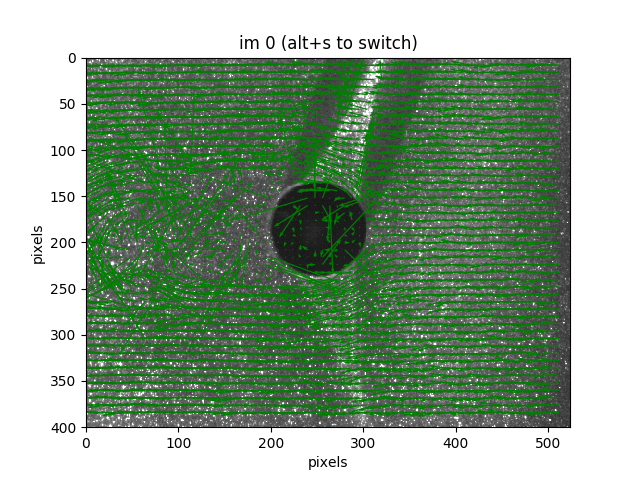

press alt+h for help


In [8]:
o.display(show_interp=True, scale=40., show_error=False)

## Post-processing

- Use a calibration to project PIV data on a physical grid:

In [9]:
from fluidimage.calibration import Calibration
help(Calibration)

Help on class Calibration in module fluidimage.calibration.calib:

class Calibration(__builtin__.object)
 |  Methods defined here:
 |  
 |  __init__(self, path_file)
 |  
 |  get_coeff(Calib, X, Y, x, y, z)
 |  
 |  phys2pix(self, Xphys, Yphys, Zphys=0)
 |  
 |  pix2phys(self, X, Y, index_level, nbypix, angle=True)
 |  
 |  pix2phys_UV(self, X, Y, dx, dy, index_level, nbypix, angle=True)
 |      Apply Tsai Calibration to the field
 |      
 |      Notes
 |      -----
 |      
 |      The displacement is 3 component BUT it corresponds to the real 3
 |      component displacement projected on the corresponding plane indexed by
 |      index_level.
 |  
 |  ud2u(Xd, Yd, Ud, Vd)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



- many basic and advanced post-processing features on gridded PIV data

In [10]:
from fluidimage.postproc.piv import PIV2d, ArrayPIV
help(PIV2d)

Help on class PIV2d in module fluidimage.postproc.piv:

class PIV2d(__builtin__.object)
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |  
 |  __div__(self, other)
 |  
 |  __init__(self, x, y, z, vx, vy, vz=nan, namevx='vx', namevy='vy', namevz='vz', unitvx='?', unitvy='?', unitvz='?', namex='x', namey='y', namez='z', unitx='?', unity='?', unitz='?')
 |  
 |  __mul__(self, other)
 |  
 |  __radd__(self, other)
 |  
 |  __rmul__(self, other)
 |  
 |  __sub__(self, other)
 |  
 |  __truediv__(self, other)
 |  
 |  compute_norm(self)
 |  
 |  display(self, scale=1, background=None)
 |  
 |  extract(self, start0, stop0, start1, stop1, phys=False)
 |  
 |  extract_square(self, cut=0, force_even=True)
 |  
 |  gaussian_filter(self, sigma, niter=1, truncate=3, valid=True)
 |  
 |  median_filter(self, size, niter=1, valid=True)
 |  
 |  truncate(self, cut=1, phys=False)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:

In [11]:
help(ArrayPIV)

Help on class ArrayPIV in module fluidimage.postproc.piv:

class ArrayPIV(__builtin__.object)
 |  Methods defined here:
 |  
 |  __add__(self, other)
 |  
 |  __delitem__(self, key)
 |  
 |  __div__(self, other)
 |  
 |  __getitem__(self, key)
 |  
 |  __init__(self, l=None)
 |  
 |  __iter__(self)
 |  
 |  __len__(self)
 |  
 |  __mul__(self, other)
 |  
 |  __radd__(self, other)
 |  
 |  __repr__(self)
 |  
 |  __rmul__(self, other)
 |  
 |  __setitem__(self, key, value)
 |  
 |  append(self, v)
 |  
 |  extend(self, l)
 |  
 |  extract(self, start0, stop0, start1, stop1, phys=False)
 |  
 |  extract_square(self, cut=0)
 |  
 |  gaussian_filter(self, sigma, niter=1, truncate=3, valid=True)
 |  
 |  median_filter(self, size, niter=1, valid=True)
 |  
 |  truncate(self, cut=1, phys=False)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __w

## Benchmarks

Example on a PIV computation (16 PIV fields, 2 passes) on my desktop machine (4 cores). No use of GPU. Ellapsed time in seconds.

|          | TPS 1000  | TPS 200  | without TPS |
|----------|-----------|----------|-------------|
| UVmat    |    136    |    42    |      38     |
|fluidimage|     54    |    20    |      15     |

TPS 1000: Thin Plate Spline interpolation with subdomains of 1000 vectors.

## Conclusions

- FluidImage is a interesting young project for scientific processing of large series of images

- It starts to be mature enough to be used in production

- UVmat and FluidImage are complementary tools